In [19]:
%pip install pandas

  Using cached pandas-1.4.2-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


In [206]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [202]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [207]:
import pylab as plt
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)

In [22]:
data = pd.read_csv('attacks.csv', encoding ='cp1252')

data_original = data.shape
data.shape

(25723, 24)

In [23]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [30]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [31]:
data.isnull()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [32]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>1000]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [33]:
data.rename({'Species ': 'Species'}, axis=1, inplace = True)

In [34]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [35]:
data.head(1000)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2010.08.18,18-Aug-2010,2010.0,Unprovoked,USA,Florida,Crescent Beach St. Johns County,Boogie Boarding,Seth Shorten,M,10,Minor injuries to foot,N,09h00,NaN,"Gainesville Sun, 8/18/2010",2010.08.18-Shorten.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.08.18,2010.08.18,5308.0,NaN,NaN
996,2010.08.17,17-Aug-2010,2010.0,Unprovoked,AUSTRALIA,Western Australia,Cowaramup Bay,Surfing,Nicholas Edwards,M,31,FATAL,Y,08h05,White shark,"The Australian, 8/17/2010",2010.08.17-Edwards.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.08.17,2010.08.17,5307.0,NaN,NaN
997,2010.08.14,14-Aug-2010,2010.0,Boating,USA,California,"Pigeon Point, San Mateo County",Kayak Fishing,Adam Coca,M,45,"No injury, kayak bitten",N,NaN,White shark,"Mercury News, 8/15/2010",2010.08.14-Coca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.08.14,2010.08.14,5306.0,NaN,NaN
998,2010.08.10.b,10-Aug-2010,2010.0,Provoked,AUSTRALIA,Queensland,"Three Mile Creek, Townsville",Fishing,female,F,NaN,Leg bitten by hooked shark PROVOKED INCIDENT,N,19h00,NaN,"Courier-Mail, 8/10/2010",2010.08.10.b-Townsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.08.10.b,2010.08.10.b,5305.0,NaN,NaN


In [36]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>1000]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [37]:
data.head(25723)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>1000]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [39]:
data.shape

(25723, 24)

In [40]:
data.columns[0]

'Case Number'

In [41]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>10000]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [42]:
data.dropna(how='all')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.Species.fillna('Unknown', inplace =True)

In [44]:
data.Time.fillna('Unknown', inplace =True)

In [45]:
data.Age.fillna('Unknown', inplace =True)

In [46]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [47]:
data.shape

(25723, 24)

In [48]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [49]:
data.drop_duplicates().shape==data.shape

False

In [50]:
data=data.drop_duplicates()

In [51]:
data.shape

(6312, 24)

In [52]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [53]:
data[['Unnamed: 22', 'Unnamed: 23']]=data[['Unnamed: 22', 'Unnamed: 23']].fillna(0)  # rellenar esas dos columnas con cero

data[['Unnamed: 22', 'Unnamed: 23']].fillna(0, inplace=True)

In [54]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,0,0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,0,0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [55]:
nan_cols=data.isna().sum()

nan_cols[nan_cols<1000]

Case Number                 2
Date                       10
Year                       12
Type                       14
Country                    60
Area                      465
Location                  550
Activity                  554
Name                      220
Sex                       575
Age                         0
Injury                     38
Fatal (Y/N)               549
Time                        0
Species                     0
Investigator or Source     27
pdf                        10
href formula               11
href                       10
Case Number.1              10
Case Number.2              10
original order              3
Unnamed: 22                 0
Unnamed: 23                 0
dtype: int64

In [56]:
data.shape

(6312, 24)

In [57]:
data.rename({'Fatal (Y/N)': 'Fatal_Yes_or_No'}, axis=1, inplace = True)

In [58]:
data.rename({'original order': 'NºCaso'}, axis=1, inplace = True)

In [59]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal_Yes_or_No', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'NºCaso', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [60]:
data.shape

(6312, 24)

In [61]:
data.isnull().sum(axis = 1)

0         0
1         0
2         0
3         0
4         0
         ..
6307     17
6308     17
6309     18
8702     19
25722    18
Length: 6312, dtype: int64

In [62]:
data = data.drop(data[data.isnull().sum(axis=1) > 7].index)

In [63]:
data.shape

(6302, 24)

In [64]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal_Yes_or_No', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'NºCaso', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [65]:
data.rename({'Unnamed: 22': 'NoName22'}, axis=1, inplace = True)

In [66]:
data.rename({'Unnamed: 23': 'NoName23'}, axis=1, inplace = True)

In [67]:
data.rename({'Investigator or Source': 'Invest_or_Source'}, axis=1, inplace = True)

In [68]:
data.rename({'href formula': 'Href_formula'}, axis=1, inplace = True)

In [69]:
data.rename({'Case Number': 'CaseNumb'}, axis=1, inplace = True)

In [70]:
data.rename({'Case Number.1': 'CaseNum_1'}, axis=1, inplace = True)

In [71]:
data.rename({'Case Number.2': 'CasNum_2'}, axis=1, inplace = True)

In [72]:
data.columns

Index(['CaseNumb', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal_Yes_or_No', 'Time',
       'Species', 'Invest_or_Source', 'pdf', 'Href_formula', 'href',
       'CaseNum_1', 'CasNum_2', 'NºCaso', 'NoName22', 'NoName23'],
      dtype='object')

In [73]:
data.head(6666)

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,0,0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,0,0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,FATAL,Y,Unknown,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,0,0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,Unknown,FATAL,Y,Unknown,Unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,0,0


In [74]:
data[(data.NoName22 != 0)].head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,Unknown,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,0


In [75]:
data[(data.NoName23 != 0)].head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,Unknown,"Buttock bitten, tissue removed",N,Unknown,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,0,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,Unknown,Leg bitten by netted shark PROVOKED INCIDENT,N,Unknown,Unknown,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,0,change filename


In [76]:
data.NoName22[1478] = 0

In [77]:
data.NoName23[4415] = 0
data.NoName23[5840] = 0

In [78]:
data[(data.NoName22 != 0)].head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23


In [79]:
data[(data.NoName23 != 0)].head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23


In [80]:
data

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,0,0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,0,0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,FATAL,Y,Unknown,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,0,0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,Unknown,FATAL,Y,Unknown,Unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,0,0


In [81]:
data.isnull()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6298,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6300,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
data.Location.fillna('Unknown', inplace =True)

In [83]:
data.Activity.fillna('Unknown', inplace =True)

In [84]:
data.Area.fillna('Unknown', inplace =True)

In [85]:
data.Fatal_Yes_or_No.fillna('Unknown', inplace =True)

In [86]:
data.isnull()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
data

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,0,0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Unknown,Pearl diving,Ahmun,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,0,0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,FATAL,Y,Unknown,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,0,0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,Unknown,FATAL,Y,Unknown,Unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,0,0


In [88]:
nan_cols=data.isna().sum()

nan_cols[nan_cols<1000]

CaseNumb              1
Date                  0
Year                  2
Type                  4
Country              50
Area                  0
Location              0
Activity              0
Name                210
Sex                 565
Age                   0
Injury               28
Fatal_Yes_or_No       0
Time                  0
Species               0
Invest_or_Source     17
pdf                   0
Href_formula          1
href                  0
CaseNum_1             0
CasNum_2              0
NºCaso                0
NoName22              0
NoName23              0
dtype: int64

In [89]:
data.Fatal_Yes_or_No.value_counts()

N          4293
Y          1388
Unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal_Yes_or_No, dtype: int64

In [90]:
data[(data.Fatal_Yes_or_No == 'M')].head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0,0,0


In [91]:
data[(data.Fatal_Yes_or_No == 'N ')].index

Int64Index([5427], dtype='int64')

In [92]:
data[(data.Fatal_Yes_or_No == '2017')].head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,0,0


In [93]:
data[(data.Fatal_Yes_or_No == 'Unknown')].index

Int64Index([  27,   76,   79,   84,   98,  107,  115,  124,  125,  145,
            ...
            6110, 6111, 6122, 6125, 6126, 6147, 6157, 6158, 6164, 6232],
           dtype='int64', length=539)

In [94]:

data.Fatal_Yes_or_No[786] = 'Unknown'

data.Fatal_Yes_or_No[285] = 'Unknown'

data.Fatal_Yes_or_No[3942, 3944, 3946, 3948, 3949, 3951, 3956] = 'N'

data.Fatal_Yes_or_No[6117] = 'Y'

data.Fatal_Yes_or_No[5427] = 'N'


In [95]:
data.Fatal_Yes_or_No.value_counts()

N          4301
Y          1389
Unknown     541
UNKNOWN      71
Name: Fatal_Yes_or_No, dtype: int64

In [96]:
data.shape

(6302, 24)

In [97]:
nan_cols=data.isna().sum()

nan_cols[nan_cols<1000]

CaseNumb              1
Date                  0
Year                  2
Type                  4
Country              50
Area                  0
Location              0
Activity              0
Name                210
Sex                 565
Age                   0
Injury               28
Fatal_Yes_or_No       0
Time                  0
Species               0
Invest_or_Source     17
pdf                   0
Href_formula          1
href                  0
CaseNum_1             0
CasNum_2              0
NºCaso                0
NoName22              0
NoName23              0
dtype: int64

In [98]:
data.Age.value_counts()

Unknown           2831
17                 154
18                 150
19                 142
20                 141
                  ... 
20?                  1
 28                  1
7      &    31       1
 30                  1
13 or 14             1
Name: Age, Length: 158, dtype: int64

In [99]:
data[(data.Age == '60'/s')].head()

SyntaxError: EOL while scanning string literal (1955373469.py, line 1)

In [102]:
data.Age[2241] = '20'
data.Age[2434] = '28'
data.Age[2422] = '7 & 31'
data.Age[2259] = '30'
data.Age[6265] = '14'
data.Age[2441] = '20'
data.Age[1955] = '35'







In [103]:
data.rename({'Sex ': 'Sex'}, axis=1, inplace = True)

In [104]:
data.Country.fillna('Unknown', inplace =True)

In [105]:
data.Name.fillna('Unknown', inplace =True)

In [106]:
data.CaseNumb.fillna('Unknown', inplace =True)

In [107]:
data.Type.fillna('Unknown', inplace =True)

In [108]:
data.Sex.fillna('Unknown', inplace =True)

In [109]:
data.Invest_or_Source.fillna('Unknown', inplace =True)

In [110]:

data.Href_formula.fillna('Unknown', inplace =True)

In [111]:
data.Injury.fillna('Unknown', inplace =True)

In [112]:
data.Year[187] = 'Unknown'

data.Year[6079] = 'Unknown'

In [113]:
data.shape

(6302, 24)

In [114]:
data[data['Type'].isna() == True]


,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23


In [115]:
data.columns

Index(['CaseNumb', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_Yes_or_No', 'Time',
       'Species', 'Invest_or_Source', 'pdf', 'Href_formula', 'href',
       'CaseNum_1', 'CasNum_2', 'NºCaso', 'NoName22', 'NoName23'],
      dtype='object')

In [116]:
data.drop(data[data.Injury=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Type=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Time=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Area=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Country=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Location=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Year=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Fatal_Yes_or_No=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Activity=='Unknown'].index, axis=0, inplace=True)
data.drop(data[data.Species=='Unknown'].index, axis=0, inplace=True)

In [117]:
data.shape

(1701, 24)

In [118]:
data

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,0,0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,0,0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,0,0
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,08h15,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,1862.07.13,13-Jul-1862,1862.0,Unprovoked,SPAIN,Cádiz,Off Algeciras,Swimming alongside the SS Kearsarge,Tibbetts,M,Unknown,FATAL,Y,18h30,16' shark,C. Moore; W.H. Bedlam,1862.07.13-Tibbetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1862.07.13,1862.07.13,333.0,0,0
6021,1852.02.26,26-Feb-1852,1852.0,Sea Disaster,SOUTH AFRICA,Western Cape Province,Danger Point,Wreck of the steamship Birkenhead,Unknown,M,Unknown,FATAL. All of the women & children on board su...,Y,01h50,White sharks,"D. Davies, pp.182-184; M. Levine, GSAF",1852.02.26-Birkenhead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1852.02.26,1852.02.26,282.0,0,0
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,0,0
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,0,0


# COMIENZAN LOS REPLACE

In [119]:
data['Time'].unique()

array(['18h00', 'Late afternoon', '17h00', 'Morning', '08h15', '10h30',
       '10h40', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '15h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', '16h00', '15h01',
       '13h45', '23h30', '09h00', '14h30', '18h30', '12h30', '14h00',
       '18h45', '06h00', '10h00', '13h30', '10h45', '11h20', '07h45',
       '11h00', '08h30', '15h45', 'Shortly before 12h00', '12h00',
       '02h00', '9h00', '15h15', '16h30', '11h30', 'After noon', '22h00',
       '15h25', '17h30', 'Morning ', '13h20', '08h00', 'Midnight',
       '09h30 / 10h00', '10h15', '18h15', '13h50', '10h25', '16h20',
       '10h45-11h15', '16h45', '15h52', '06h15', '14h40', '19h00',
       '08h45', '12h10', '18h05', '12h25', '17h51', '16h12', '12h45',
       '10h50', '13h00', '09h45', '11h45', '06h45', '05h00', '03h30',
       '11h15', '06h30', '20h00', '16h40', '11h10', '17h50',
       '18h15-18h30', '08h20', '20h30', '15h19', '10h55', '15h55',
       '23h00', '12h40', '16h05', '

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 6265
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CaseNumb          1701 non-null   object 
 1   Date              1701 non-null   object 
 2   Year              1701 non-null   object 
 3   Type              1701 non-null   object 
 4   Country           1701 non-null   object 
 5   Area              1701 non-null   object 
 6   Location          1701 non-null   object 
 7   Activity          1701 non-null   object 
 8   Name              1701 non-null   object 
 9   Sex               1701 non-null   object 
 10  Age               1701 non-null   object 
 11  Injury            1701 non-null   object 
 12  Fatal_Yes_or_No   1701 non-null   object 
 13  Time              1701 non-null   object 
 14  Species           1701 non-null   object 
 15  Invest_or_Source  1701 non-null   object 
 16  pdf               1701 non-null   object 


In [121]:
data.Time = data.Time.str.replace('()', '')

data.Time = data.Time.str.replace('8h00', 'Morning')

data.Time = data.Time.str.replace('--', 'Unknown')

data.Time = data.Time.str.replace('?', '')

data.Time = data.Time.str.replace('X', 'Unknown')

data.Time = data.Time.str.replace('18h00', 'Afternoon')

data.Time = data.Time.str.replace('Late afternoon', 'Afternoon')

data.Time = data.Time.str.replace('17:', 'Afternoon')

data.Time = data.Time.str.replace('8h15', 'Morning')

data.Time = data.Time.str.replace('10h30', 'Morning')

data.Time = data.Time.str.replace('Afternoon00', 'Afternoon')

data.Time = data.Time.str.replace('0Morning', 'Morning')

data.Time = data.Time.str.replace('10:40', 'Morning')

data.Time = data.Time.str.replace('07h00', 'Morning')

data.Time = data.Time.str.replace('09h30', 'Morning')

data.Time = data.Time.str.replace('21h50', '')

data.Time = data.Time.str.replace('09h40', 'Morning')

data.Time = data.Time.str.replace('15h00', 'Afternoon')

data.Time = data.Time.str.replace('15h01', 'Afternoon')

data.Time = data.Time.str.replace('Shortly before 13:00', 'Afternoon')

data.Time = data.Time.str.replace('02h00', 'Night')

data.Time = data.Time.str.replace('1Morning-18:30', 'Afternoon')

#data.Time = data.Time.str.replace('Ni', 'Night')

data.Time = data.Time.str.replace('Dusk', 'Night')

data.Time = data.Time.str.replace('Afternoon35', 'Afternoon')

data.Time = data.Time.str.replace('01h50', 'Night')

data.Time = data.Time.str.replace('Afternoon30', 'Afternoon')

data.Time = data.Time.str.replace('Midday', 'Morning')

data.Time = data.Time.str.replace('10::', 'Morning')

data.Time = data.Time.str.replace('Afternoon or hUnknown', 'Unknown')

data.Time = data.Time.str.replace('Afterdark', 'Night')

#data.Time = data.Time.str.replace('Unknown', 'hh30')

data.Time = data.Time.str.replace('12h30', 'Afternoon')

data.Time = data.Time.str.replace('16h00', 'Afternoon')

data.Time = data.Time.str.replace('Nightghtghtghtghtght', 'Night')

data.Time = data.Time.str.replace('hh55', 'Unknown')

data.Time = data.Time.str.replace('12:40', 'Afternoon')

data.Time = data.Time.str.replace('09h00', 'Morning')

data.Time = data.Time.str.replace('23h30', 'Night')

data.Time = data.Time.str.replace('11h10', 'Morning')

data.Time = data.Time.str.replace('07h30', 'Morning')

data.Time = data.Time.str.replace('10h00', 'Morning')

data.Time = data.Time.str.replace('06h00', 'Morning')

data.Time = data.Time.str.replace('9h00', 'Morning')

data.Time = data.Time.str.replace('11h00', 'Morning')

data.Time = data.Time.str.replace('Shortly before 12h00', 'Morning')

data.Time = data.Time.str.replace('12h10', 'Morning')

data.Time = data.Time.str.replace('16h30', 'Afternoon')

data.Time = data.Time.str.replace('18h05', 'Afternoon')

data.Time = data.Time.str.replace('19h28', 'Afternoon')

data.Time = data.Time.str.replace('01h00', 'Night')


In [122]:
data.Time = data.Time.str.replace('h00', 'Unknown')

data.Time = data.Time.str.replace('Afternoon or Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('Late afternon', 'Afternoon')

data.Time = data.Time.str.replace('After dusk', 'Night')

data.Time = data.Time.str.replace('>14h30', 'Afternoon')

data.Time = data.Time.str.replace('Morning or 14h00', 'Afternoon')

data.Time = data.Time.str.replace('After dark', 'Night')

data.Time = data.Time.str.replace('13h05', 'Afternoon')

data.Time = data.Time.str.replace('16h23', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon10', 'Afternoon')

data.Time = data.Time.str.replace('Morning or 13h30', 'Afternoon')

In [123]:
data.Time.unique()

array(['1Morning', 'Afternoon', '17Unknown', 'Morning', '10h40', '',
       '17h35', '15h30', '1Morning, Night', '13h45', 'Night', '14h30',
       '18h30', '14Unknown', '18h45', '13h30', '10h45', '11h20', '07h45',
       '08h30', '15h45', '12Unknown', '15h15', '11h30', 'After noon',
       '22Unknown', '15h25', '17h30', 'Morning ', '13h20', 'Midnight',
       'Morning / Morning', '10h15', '13h50', '10h25', '16h20',
       '10h45-11h15', '16h45', '15h52', '06h15', '14h40', '08h45',
       '12h25', '17h51', '16h12', '12h45', '10h50', '13Unknown', '09h45',
       '11h45', '06h45', '05Unknown', '03h30', '11h15', '06h30',
       '20Unknown', '16h40', '17h50', '1Morning-18h30', '08h20', '20h30',
       '15h19', '10h55', '15h55', '23Unknown', '12h40', '16h05', '14h10',
       '12h50', '13h40', '13h24', 'Morning - Morning', '0830', '11h40',
       '08h10', '15h56', '1600', '09h05', '07h15', '14h20', '07h20',
       '12h38', '05h50', '15h50', '11h05', '15h40', '05h45', '13h25',
       '13h26', 

In [124]:
data.Time = data.Time.str.replace('17h35', 'Afternoon')

data.Time = data.Time.str.replace('10h40', 'Morning')

data.Time = data.Time.str.replace('MorningNight', 'Afternoon')

data.Time = data.Time.str.replace('13h45', 'Afternoon')

data.Time = data.Time.str.replace('10h45', 'Morning')

data.Time = data.Time.str.replace('Shortly before Morning', 'Afternoon')

data.Time = data.Time.str.replace('10h15', 'Morning')

data.Time = data.Time.str.replace('Between Morning', 'Morning')



In [125]:
data.Time = data.Time.str.replace('20h45 (Afternoon)', 'Afternoon')

data.Time = data.Time.str.replace('06h45', 'Morning')

data.Time = data.Time.str.replace('11h45', 'Morning')

data.Time = data.Time.str.replace('09h45', 'Morning')

data.Time = data.Time.str.replace('12h45', 'Morning')

data.Time = data.Time.str.replace('17h51', 'Afternoon')

data.Time = data.Time.str.replace('08h45', 'Morning')

data.Time = data.Time.str.replace('06h15', 'Morning')

data.Time = data.Time.str.replace('15h52', 'Afternoon')

data.Time = data.Time.str.replace('16h45', 'Afternoon')

data.Time = data.Time.str.replace('10h45-Morning', 'Morning')

data.Time = data.Time.str.replace('Morning Morning', 'Morning')

data.Time = data.Time.str.replace('17h30', 'Afternoon')

data.Time = data.Time.str.replace('15h25', 'Afternoon')

data.Time = data.Time.str.replace('15h15', 'Afternoon')

data.Time = data.Time.str.replace('15h45', 'Afternoon')

data.Time = data.Time.str.replace('18h45', 'Afternoon')

data.Time = data.Time.str.replace('07h45', 'Morning')

In [126]:
data.Time = data.Time.str.replace('17Unknown or Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('17h20', 'Afternoon')

data.Time = data.Time.str.replace('15j45', 'Afternoon')

data.Time = data.Time.str.replace('14h45', 'Afternoon')

data.Time = data.Time.str.replace('19h15', 'Afternoon')

data.Time = data.Time.str.replace('15h35', 'Afternoon')

data.Time = data.Time.str.replace('17h45', 'Afternoon')

data.Time = data.Time.str.replace('13h15', 'Afternoon')

data.Time = data.Time.str.replace('05h45', 'Night')

data.Time = data.Time.str.replace('15h40', 'Afternoon')

data.Time = data.Time.str.replace('15h50', 'Afternoon')

data.Time = data.Time.str.replace('07h15', 'Morning')

data.Time = data.Time.str.replace('15h56', 'Afternoon')

data.Time = data.Time.str.replace('15h55', 'Afternoon')

data.Time = data.Time.str.replace('15h19', 'Afternoon')

data.Time = data.Time.str.replace('Morningfternoon', 'Morning')

data.Time = data.Time.str.replace('17h50', 'Afternoon')

data.Time = data.Time.str.replace('11h15', 'Morning')

In [127]:
data.Time = data.Time.str.replace('LateAfternoon', 'Afternoon')

data.Time = data.Time.str.replace('Betwen Morning Morning', 'Morning')

data.Time = data.Time.str.replace('20h15', 'Afternoon')

data.Time = data.Time.str.replace('17h40', 'Afternoon')

data.Time = data.Time.str.replace('8:04 pm', 'Morning')

data.Time = data.Time.str.replace('Shortly before Morning', 'Afternoon')

data.Time = data.Time.str.replace('20h45 (Afternoon)', 'Morning')

data.Time = data.Time.str.replace('MorningMorning', 'Morning')

data.Time = data.Time.str.replace('14h15', 'Afternoon')

data.Time = data.Time.str.replace('Just after Morning', 'Morning')

data.Time = data.Time.str.replace('17h11', 'Afternoon')

data.Time = data.Time.str.replace('17Unknown or 17h40', 'Afternoon')

data.Time = data.Time.str.replace('16h15', 'Afternoon')

data.Time = data.Time.str.replace('15h20', 'Afternoon')

data.Time = data.Time.str.replace('17h15', 'Afternoon')

data.Time = data.Time.str.replace('"Afternoon"', 'Afternoon')

data.Time = data.Time.str.replace('19h45', 'Afternoon')

data.Time = data.Time.str.replace('11h115', 'Morning')

In [128]:
data.Time = data.Time.str.replace('1500', 'Afternoon')

data.Time = data.Time.str.replace('Morningor Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('17h10', 'Afternoon')

data.Time = data.Time.str.replace('Morning/ 15h30', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon -Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('12h45 / 13h45', 'Afternoon')

data.Time = data.Time.str.replace('Morning/Afternoon', 'Morning')

data.Time = data.Time.str.replace('Afternoon or 15h45', 'Afternoon')

data.Time = data.Time.str.replace(' Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon or Morning', 'Afternoon')

data.Time = data.Time.str.replace('Betwen Morning& Morning', 'Morning')

data.Time = data.Time.str.replace('15h06', 'Afternoon')

data.Time = data.Time.str.replace('>06h45', 'Morning')

data.Time = data.Time.str.replace('Morning.', 'Morning')

data.Time = data.Time.str.replace('12h15', 'Morning')

data.Time = data.Time.str.replace('15h05', 'Afternoon')

data.Time = data.Time.str.replace('20:15', 'Afternoon')

data.Time = data.Time.str.replace('09h15', 'Morning')



data.Time = data.Time.str.replace('hUnknown', 'Unknown')

data.Time = data.Time.str.replace('hhh', 'Unknown')

# data.Time = data.Time.str.replace('', 'Unknown')

data.Time = data.Time.str.replace('1Morning', 'Morning')



data.Time = data.Time.str.replace('10hh30', 'Morning')

data.Time = data.Time.str.replace('13h30', 'Morning')

data.Time = data.Time.str.replace('18hh30', 'Afternoon')

data.Time = data.Time.str.replace('18h30', 'Afternoon')

data.Time = data.Time.str.replace('14h30', 'Afternoon')

data.Time = data.Time.str.replace('Morning30', 'Morning')

data.Time = data.Time.str.replace('Morning Night', 'Afternoon')

data.Time = data.Time.str.replace('hh30', 'Unknown')




data.Time = data.Time.str.replace('Afternoon (Afternoon)', 'Afternoon')

data.Time = data.Time.str.replace('16h20', 'Afternoon')

data.Time = data.Time.str.replace('10h25', 'Morning')

data.Time = data.Time.str.replace('13h50', 'Afternoon')

data.Time = data.Time.str.replace('1Morning', 'Morning')

data.Time = data.Time.str.replace('Morning/ Morning', 'Morning')

data.Time = data.Time.str.replace('Midnight', 'Night')

data.Time = data.Time.str.replace('13h20', 'Morning')

data.Time = data.Time.str.replace('hh25', 'Unknown')

data.Time = data.Time.str.replace('22Unknown', 'Night')

data.Time = data.Time.str.replace('After noon', 'Afternoon')

data.Time = data.Time.str.replace('11h30', 'Morning')

data.Time = data.Time.str.replace('Nightght', 'Night')

data.Time = data.Time.str.replace('12Unknown', 'Morning')

data.Time = data.Time.str.replace('08h30', 'Morning')

data.Time = data.Time.str.replace('11h20', 'Morning')



data.Time = data.Time.str.replace('03h30', 'Night')

data.Time = data.Time.str.replace('05Unknown', 'Night')

data.Time = data.Time.str.replace('06hh30', 'Night')

data.Time = data.Time.str.replace('Afternoon30 (Afternoon)', 'Afternoon')

data.Time = data.Time.str.replace('13Unknown', 'Morning')

data.Time = data.Time.str.replace('10h50', 'Morning')

data.Time = data.Time.str.replace('Morning0', 'Morning')

data.Time = data.Time.str.replace('16h12', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon51', 'Afternoon')

data.Time = data.Time.str.replace('12h25', 'Morning')

data.Time = data.Time.str.replace('08hh30', 'Morning')

data.Time = data.Time.str.replace('14h40', 'Afternoon')

data.Time = data.Time.str.replace('06hh', 'Night')

data.Time = data.Time.str.replace('hh52', 'Unknown')

data.Time = data.Time.str.replace('Afternoon30', 'Afternoon')

data.Time = data.Time.str.replace('10hh30-Morning', 'Morning')


data.Time = data.Time.str.replace('Afternoon30 (Afternoon)', 'Afternoon')

data.Time = data.Time.str.replace('Morning- Morning', 'Morning')

data.Time = data.Time.str.replace('12h50', 'Morning')

data.Time = data.Time.str.replace('14h10', 'Afternoon')

data.Time = data.Time.str.replace('16h05', 'Afternoon')

data.Time = data.Time.str.replace('12h40', 'Morning')

data.Time = data.Time.str.replace('23Unknown', 'Night')

data.Time = data.Time.str.replace('10h55', 'Morning')

data.Time = data.Time.str.replace('hh19', 'Unknown')

data.Time = data.Time.str.replace('20h30', 'Afternoon')

data.Time = data.Time.str.replace('08h20', 'Morning')

data.Time = data.Time.str.replace('Afternoon50', 'Afternoon')

data.Time = data.Time.str.replace('16h40', 'Afternoon')

data.Time = data.Time.str.replace('20Unknown', 'Afternoon')

data.Time = data.Time.str.replace('06h30', 'Morning')

data.Time = data.Time.str.replace('11hh', 'Morning')




data.Time = data.Time.str.replace('07h20', 'Morning')

data.Time = data.Time.str.replace('hh50', 'Unknown')

data.Time = data.Time.str.replace('05h50', 'Night')

data.Time = data.Time.str.replace('12h38', 'Morning')

data.Time = data.Time.str.replace('07h20', 'Morning')

data.Time = data.Time.str.replace('14h20', 'Afternoon')

data.Time = data.Time.str.replace('07hh', 'Morning')

data.Time = data.Time.str.replace('09h05', 'Morning')

data.Time = data.Time.str.replace('1600', 'Afternoon')

data.Time = data.Time.str.replace('hh56', 'Unknown')

data.Time = data.Time.str.replace('08h10', 'Morning')

data.Time = data.Time.str.replace('11h40', 'Morning')

data.Time = data.Time.str.replace('0830', 'Morning')

data.Time = data.Time.str.replace('Morning-Morning', 'Morning')

data.Time = data.Time.str.replace('13h24', 'Afternoon')

data.Time = data.Time.str.replace('13h40', 'Afternoon')



data.Time = data.Time.str.replace('10h35', 'Morning')

data.Time = data.Time.str.replace('08h05', 'Morning')

data.Time = data.Time.str.replace('08h50', 'Morning')

data.Time = data.Time.str.replace('14h55', 'Afternoon')

data.Time = data.Time.str.replace('hh35', 'Unknown')

data.Time = data.Time.str.replace('18h20', 'Afternoon')

data.Time = data.Time.str.replace('Early afternoon', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon45', 'Afternoon')
data.Time = data.Time.str.replace('13hh', 'Morning')

data.Time = data.Time.str.replace('Evening', 'Afternoon')

data.Time = data.Time.str.replace('09h11', 'Morning')

data.Time = data.Time.str.replace('13h26', 'Morning')

data.Time = data.Time.str.replace('13h25', 'Morning')

data.Time = data.Time.str.replace('05hh30', 'Morning')

data.Time = data.Time.str.replace('hh40', 'Unknown')

data.Time = data.Time.str.replace('11h05', 'Morning')



data.Time = data.Time.str.replace('11h1h', 'Morning')

data.Time = data.Time.str.replace('"Just before Morning', 'Morning')

data.Time = data.Time.str.replace('18h50', 'Afternoon')

data.Time = data.Time.str.replace('Early morning', 'Morning')

data.Time = data.Time.str.replace('13h55', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon20', 'Afternoon')

data.Time = data.Time.str.replace('09h20', 'Morning')

data.Time = data.Time.str.replace('Before Morning', 'Morning')
data.Time = data.Time.str.replace('19h30', 'Afternoon')

data.Time = data.Time.str.replace('10h16', 'Morning')

data.Time = data.Time.str.replace('10h27', 'Morning')

data.Time = data.Time.str.replace('09h35', 'Morning')

data.Time = data.Time.str.replace('hj45', 'Unknown')

data.Time = data.Time.str.replace('Lunchtime', 'Afternoon')

data.Time = data.Time.str.replace('21Unknown', 'Night')

data.Time = data.Time.str.replace('19hh', 'Afternoon')



data.Time = data.Time.str.replace('Afternoon30 (Afternoon)', 'Afternon')

data.Time = data.Time.str.replace('12h55','Morning')

data.Time = data.Time.str.replace('>Morning', 'Morning')

data.Time = data.Time.str.replace('Afternoon40', 'Afternoon')

data.Time = data.Time.str.replace('07h08', 'Morning')

data.Time = data.Time.str.replace('16hh', 'Afternoon')

data.Time = data.Time.str.replace('06h10', 'Morning')

data.Time = data.Time.str.replace('16h10', 'Afternoon')

data.Time = data.Time.str.replace('12h05', 'Morning')

data.Time = data.Time.str.replace('Afternoonh', 'Afternoon')

data.Time = data.Time.str.replace('Just before sundown', 'Afternoon')

data.Time = data.Time.str.replace('"Evening"', 'Afternoon')

data.Time = data.Time.str.replace('11h50', 'Morning')

data.Time = data.Time.str.replace('07h05', 'Morning')

data.Time = data.Time.str.replace('12h39', 'Morning')

data.Time = data.Time.str.replace('19hh30', 'Afternoon')




data.Time = data.Time.str.replace('08h40', 'Morning')

data.Time = data.Time.str.replace('02h30', 'Night')

data.Time = data.Time.str.replace('Just after 12Unknown', 'Morning')

data.Time = data.Time.str.replace('13h23', 'Afternoon')

data.Time = data.Time.str.replace('13h53', 'Afternoon')

data.Time = data.Time.str.replace('10h07', 'Morning')

data.Time = data.Time.str.replace('12h20', 'Morning')

data.Time = data.Time.str.replace('Afternoon11', 'Afternoon')

data.Time = data.Time.str.replace('16h14', 'Afternoon')



data.Time = data.Time.str.replace('8h04 pm', 'Morning')

data.Time = data.Time.str.replace('11h53', 'Morning')

data.Time = data.Time.str.replace('12h34', 'Morning')

data.Time = data.Time.str.replace('Late morning', 'Morning')

data.Time = data.Time.str.replace('Sunset', 'Afternoon')

data.Time = data.Time.str.replace('Afternoon30 (Sunset)', 'Afternoon')

data.Time = data.Time.str.replace('Morning-Morning', 'Morning')

data.Time = data.Time.str.replace('10h10', 'Morning')

data.Time = data.Time.str.replace('14hh', 'Afternoon')

data.Time = data.Time.str.replace('\xa0 ', 'Unknown')

data.Time = data.Time.str.replace('13h345', 'Afternoon')

data.Time = data.Time.str.replace('Shortly after midnight', 'Afternoon')

data.Time = data.Time.str.replace('Early Morning', 'Morning')

data.Time = data.Time.str.replace('14h35', 'Afternoon')

data.Time = data.Time.str.replace('11h56', 'Morning')



In [129]:
data.Time = data.Time.str.replace('Morning or Afternoon', 'Unknown')

data.Time = data.Time.str.replace(' Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('12h54', 'Morning')

data.Time = data.Time.str.replace('hh06', 'Unknown')

data.Time = data.Time.str.replace('Morning.', 'Morning')

data.Time = data.Time.str.replace('2 hours after Opperman', 'Unknown')

data.Time = data.Time.str.replace('09h55', 'Morning')

data.Time = data.Time.str.replace('14h16', 'Afternoon')

data.Time = data.Time.str.replace('20hh', 'Afternoon')

data.Time = data.Time.str.replace('09hh', 'Morning')

data.Time = data.Time.str.replace('10h28', 'Morning')

data.Time = data.Time.str.replace('18h25', 'Afternoon')

data.Time = data.Time.str.replace('11h25', 'Morning')

data.Time = data.Time.str.replace('Noon', 'Afternoon')

data.Time = data.Time.str.replace('P.M.', 'Afternoon')

data.Time = data.Time.str.replace('12h35', 'Morning')

In [130]:
data.Time = data.Time.str.replace('1Morning / 20Unknown', 'Morning')

data.Time = data.Time.str.replace('14Unknown', 'Afternoon')

data.Time = data.Time.str.replace('03Unknown', 'Night')

data.Time = data.Time.str.replace('04Unknown', 'Night')

data.Time = data.Time.str.replace('>06hh30', 'Morning')

data.Time = data.Time.str.replace('12h33', 'Morning')

data.Time = data.Time.str.replace('07h40', 'Morning')

data.Time = data.Time.str.replace('A.M', 'Morning')

data.Time = data.Time.str.replace('07h10', 'Morning')

data.Time = data.Time.str.replace('18h12', 'Afternoon')

data.Time = data.Time.str.replace('""', 'Unknown')

data.Time = data.Time.str.replace('11h06', 'Morning')

data.Time = data.Time.str.replace('12hh', 'Morning')

data.Time = data.Time.str.replace('07h19', 'Morning')

data.Time = data.Time.str.replace('Morning / 11h30', 'Morning')

data.Time = data.Time.str.replace('hh05', 'Unknown')

In [138]:
data.Time = data.Time.str.replace('18h40', 'Afternoon')

data.Time = data.Time.str.replace('06h50', 'Night')

data.Time = data.Time.str.replace('Daytime', 'Morning')

data.Time = data.Time.str.replace('Mid-morning', 'Morning')

data.Time = data.Time.str.replace('10h20', 'Morning')

data.Time = data.Time.str.replace('18h10', 'Afternoon')

data.Time = data.Time.str.replace('14h50', 'Afternoon')

data.Time = data.Time.str.replace('08h35', 'Morning')

data.Time = data.Time.str.replace('06j00', 'Morning')

data.Time = data.Time.str.replace('08h57', 'Morning')

data.Time = data.Time.str.replace('21h30', 'Night')

data.Time = data.Time.str.replace('05h40', 'Morning')

data.Time = data.Time.str.replace('16h50', 'Afternoon')

data.Time = data.Time.str.replace('16h55', 'Afternoon')

data.Time = data.Time.str.replace('Between Morning & 07h20', 'Morning')

data.Time = data.Time.str.replace('16h35', 'Afternoon')

data.Time = data.Time.str.replace('Late Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('"Night"', 'Night')

data.Time = data.Time.str.replace('Late night', 'Night')

data.Time = data.Time.str.replace('19h35', 'Afternoon')

data.Time = data.Time.str.replace('Morning / hh30', 'Morning')

data.Time = data.Time.str.replace('14Unknown - Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('12hh30 / 13hh30', 'Afternoon')

data.Time = data.Time.str.replace('Dawn', 'Morning')



data.Time = data.Time.str.replace('Morningorning', 'Morning')

data.Time = data.Time.str.replace('Morningfternoon', 'Afternoon')

data.Time = data.Time.str.replace('"Afternoon"', 'Afternoon')

data.Time = data.Time.str.replace('Just after Morning', 'Morning')

data.Time = data.Time.str.replace('Afternoon -Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('Late Afternoon', 'Afternoon')

data.Time = data.Time.str.replace('"Night"', 'Night')

data.Time = data.Time.str.replace('Late night', 'Night')

data.Time = data.Time.str.replace('Afternoon or Morning', 'Afternoon')

data.Time = data.Time.str.replace('Morning 15h30', 'Morning')

data.Time = data.Time.str.replace('17Unknown', 'Afternoon')

data.Time = data.Time.str.replace('12hh30 / 13hh30', 'Afternoon')

data.Time = data.Time.str.replace('Morningr Afternoon', 'Morning')


In [142]:

data.Time = data.Time.str.replace('MorningMorning', 'Morning')

data.Time = data.Time.str.replace('LateAfternoon', 'Afternoon')


In [143]:
data.Time.unique()

array(['Morning', 'Afternoon', 'Unknown', 'Night'], dtype=object)

In [133]:
data[(data.Time == 'Unknown')].index

Int64Index([1730, 1731, 1790, 1797, 1855, 2186, 2710], dtype='int64')

In [134]:
data.Time[ 881,  987, 1021, 1388, 1497, 1652, 1780, 1841, 2007, 2042, 2111,2147, 2152, 2533, 2540, 2624, 2748, 2763, 2794, 2849, 2894, 2939,3251, 3575, 3649, 4059, 4162, 5168, 5311] = 'Afternoon'
data.Time[1884]= 'Afternoon'
data.Time[23]= 'Unknown'
data.Time[1826,5148] = 'Unknown'
data.Time[37,  121,  376,  616,  622,  661,  760,  884,  930, 1042, 1096,1227, 1315, 1398, 1473, 1481, 1519, 1605, 1718, 1836]= 'Afternoon'
data.Time[2137, 2432, 2519, 2555, 2587, 2681, 2683, 2877, 2883, 3631, 3916,4020, 4061, 4207, 4874, 4951, 5231, 5248]= 'Afternoon'

In [144]:
data.shape

(1701, 24)

In [215]:
data.drop(data[data.Time=='Unknown'].index, axis=0, inplace=True)

In [216]:
data.shape

(1691, 24)

In [229]:
data.Time[data.Time == 'Morning'].index

# Hay 830 ataques por La mañana

Int64Index([   0,   10,   13,   16,   18,   20,   21,   24,   30,   35,
            ...
            5280, 5484, 5485, 5498, 5566, 5648, 5717, 5732, 5823, 5922],
           dtype='int64', length=830)

In [230]:
data.Time[data.Time == 'Afternoon'].index

#Hay 797 ataques por la tarde

Int64Index([   6,    8,   22,   34,   36,   37,   40,   42,   49,   51,
            ...
            5375, 5404, 5545, 5608, 5814, 5817, 5843, 5853, 5882, 5970],
           dtype='int64', length=797)

In [231]:
data.Time[data.Time == 'Night'].index

#Hay 61 ataques por la noche

Int64Index([  64,  104,  196,  254,  301,  451,  452,  632,  805,  835,  971,
            1036, 1091, 1220, 1329, 1347, 1405, 1592, 1795, 1806, 1886, 1936,
            1995, 2244, 2247, 2313, 2352, 2496, 2645, 2901, 2927, 2928, 2929,
            2940, 3075, 3127, 3181, 3277, 3376, 3520, 3530, 3578, 3734, 3812,
            3907, 4009, 4035, 4111, 4395, 4403, 4462, 4746, 4851, 4897, 4939,
            5000, 5406, 5616, 5684, 5910, 6021],
           dtype='int64')

In [150]:
data.head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Morning,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,0,0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,Afternoon,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,0,0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,0,0
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,Morning,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0,0,0


In [151]:
data.Time.describe

<bound method NDFrame.describe of 0         Morning
6       Afternoon
8       Afternoon
10        Morning
13        Morning
          ...    
5970    Afternoon
6021        Night
6242    Afternoon
6243    Afternoon
6265    Afternoon
Name: Time, Length: 1691, dtype: object>

In [185]:
data.Age.unique()

array(['57', '18', '15', '32', '21', 'Unknown', '30', '60', '33', '19',
       '25', '10', '69', '55', '35', '20', '54', '22', '31', '40', '37',
       '13', '34', '50', '46', '48', '17', '28', '65', '73', '58', '36',
       '60s', '51', '61', '59', '42', '6', '23', '29', '39', '24', '12',
       '26', '11', '71', '43', '44', '14', '27', '62', '52', '38', '68',
       '16', '47', '63', '70', '9', '41', '53', '20s', '7', '66', '45',
       '74', '64', '8', '56', '49', '18 or 20', 'Teen', '77', '36 & 26',
       '84', '30 or 36', '5', '>50', '9 & 12', '30 & 32', '50 & 30',
       '13 or 18', '7 or 8', '9 or 10'], dtype=object)

In [183]:
data[(data.Age == "40s")].index

Int64Index([468], dtype='int64')

In [184]:
data.Age[1824, 4390, 1825]= 'Unknown'
data.Age[2496]= '60'
data.Age[1901]= '6'
data.Age[1481, 1526]= '30'
data.Age[468]= '40'

In [198]:
data.Species.unique()

array(['White shark', 'Tiger shark', "Bull shark, 6'", 'Grey reef shark',
       'Invalid incident', 'Shark involvement not confirmed',
       'Questionable', '3 m shark', 'White shark, 3.5 m',
       'White shark, 2.5 m', "Tiger shark, 12'", 'Wobbegong shark',
       '3.5 m shark', '1.8 m shark',
       'Juvenile white shark,  2.7 to 3.2 m', 'Bull shark, 2 m',
       'Possibly a wobbegong', 'Grey reef shark. 2 m', 'small shark',
       'White shark, 4.6 m', '2 m shark', 'Wobbegong shark, 1 m',
       'White shark, 4.5 m', 'Spinner shark, 4 to 5 feet',
       'Tiger shark, 8 to 10 feet', "8' shark", "5' shark",
       "4' to 5' shark", "5' to 6' shark", 'White shark, 3 to 3.5m ',
       'White shark, 3 m', "White shark, 5' to 7'",
       'Possibly a juvenile blacktip shark', "4' shark",
       "White shark, 10'", "Blue shark 6'", "White shark, 11' to 13'",
       "White shark, 8' to 10'", "White shark, 9'",
       "Bull shark, 4' to 5'", 'White shark, 4 m', 'Seven-gill shark',
       "

In [166]:
len(data.CaseNumb.unique())

1689

In [173]:
data.Time[data.Species == 'White shark'].index

Int64Index([   0,   34,  120,  155,  169,  197,  271,  283,  380,  395,  396,
             401,  408,  427,  494,  524,  613,  614,  638,  661,  726,  795,
             797,  805,  861,  871,  956,  971,  972,  984,  996, 1051, 1067,
            1096, 1183, 1286, 1324, 1356, 1446, 1515, 1536, 1543, 1555, 1582,
            1617, 1638, 1665, 1747, 1830, 1995, 2004, 2099, 2115, 2182, 2210,
            2214, 2268, 2281, 2286, 2344, 2456, 2504, 2623, 2653, 2686, 2728,
            2765, 2921, 2955, 2964, 3037, 3078, 3139, 3141, 3199, 3211, 3214,
            3277, 3296, 3356, 3447, 3514, 3724, 3793, 3850, 3876, 3883, 3897,
            3927, 4171, 4194, 4200, 4461, 4854, 4888, 4889, 5231, 5545],
           dtype='int64')

In [191]:
data.shape

(1691, 24)

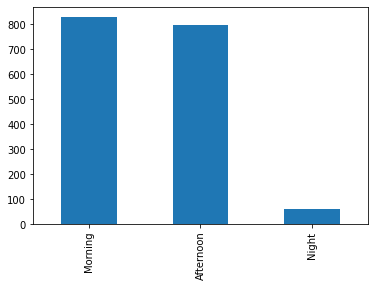

In [251]:
# plt.figure(figsize=(10, 6))

data.Time.value_counts().plot.bar();

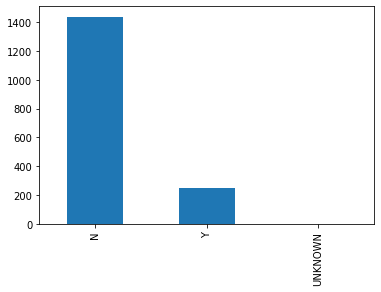

In [298]:
data.Fatal_Yes_or_No.value_counts().plot.bar();

In [209]:
data.head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Morning,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,0,0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,Afternoon,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,0,0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,0,0
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,Morning,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0,0,0


In [223]:
data.CaseNum_1.replace('\.','-', regex = True, inplace = True)
data.CaseNum_1.replace('[a-zA-Z]',' ', regex = True, inplace = True)


In [211]:
data.CaseNum_1.unique()

array(['2018-06-25', '2018-06-03- ', '2018-05-26- ', ..., '  -0064',
       '  -0063', '  -0038'], dtype=object)

In [297]:
for i,row in data.iterrows():
    print(i, row['NºCaso'])

0 6303.0
6 6297.0
8 6295.0
10 6293.0
13 6290.0
16 6287.0
18 6285.0
20 6283.0
21 6282.0
22 6281.0
24 6279.0
30 6273.0
34 6269.0
35 6268.0
36 6267.0
37 6266.0
38 6265.0
40 6263.0
42 6261.0
43 6260.0
49 6254.0
51 6252.0
53 6250.0
60 6243.0
63 6240.0
64 6239.0
66 6237.0
71 6232.0
72 6231.0
73 6230.0
74 6229.0
75 6228.0
77 6226.0
78 6225.0
80 6223.0
87 6216.0
89 6214.0
96 6207.0
100 6203.0
102 6201.0
104 6199.0
105 6198.0
113 6190.0
116 6187.0
117 6186.0
118 6185.0
120 6183.0
121 6182.0
123 6180.0
133 6170.0
134 6169.0
138 6165.0
140 6163.0
155 6148.0
156 6147.0
166 6137.0
169 6134.0
172 6131.0
177 6126.0
183 6120.0
186 6117.0
191 6112.0
192 6111.0
196 6107.0
197 6106.0
198 6105.0
199 6104.0
203 6100.0
211 6092.0
219 6084.0
220 6083.0
227 6076.0
232 6071.0
234 6069.0
242 6061.0
246 6057.0
251 6052.0
254 6049.0
259 6044.0
261 6042.0
263 6040.0
264 6039.0
267 6036.0
268 6035.0
271 6032.0
273 6030.0
275 6028.0
277 6026.0
278 6025.0
280 6023.0
281 6022.0
283 6020.0
284 6019.0
286 6017.0
288 601

2000 4303.0
2003 4300.0
2004 4299.0
2005 4298.0
2007 4296.0
2011 4292.0
2013 4290.0
2015 4288.0
2016 4287.0
2018 4285.0
2019 4284.0
2022 4281.0
2023 4280.0
2024 4279.0
2039 4264.0
2041 4262.0
2042 4261.0
2043 4260.0
2048 4255.0
2049 4254.0
2050 4253.0
2051 4252.0
2061 4242.0
2062 4241.0
2063 4240.0
2064 4239.0
2065 4238.0
2066 4237.0
2070 4233.0
2072 4231.0
2084 4219.0
2087 4216.0
2090 4213.0
2095 4208.0
2096 4207.0
2099 4204.0
2105 4198.0
2107 4196.0
2109 4194.0
2110 4193.0
2111 4192.0
2112 4191.0
2113 4190.0
2114 4189.0
2115 4188.0
2117 4186.0
2118 4185.0
2120 4183.0
2122 4181.0
2123 4180.0
2124 4179.0
2125 4178.0
2126 4177.0
2131 4172.0
2134 4169.0
2136 4167.0
2137 4166.0
2143 4160.0
2147 4156.0
2150 4153.0
2151 4152.0
2152 4151.0
2155 4148.0
2167 4136.0
2169 4134.0
2171 4132.0
2175 4128.0
2179 4124.0
2181 4122.0
2182 4121.0
2187 4116.0
2188 4115.0
2189 4114.0
2191 4112.0
2192 4111.0
2193 4110.0
2198 4105.0
2199 4104.0
2200 4103.0
2206 4097.0
2210 4093.0
2214 4089.0
2218 4085.0
2219

In [292]:
data.CaseNum_1[6242, 6243, 6265, 5910]= 'Unknown'


In [256]:
data.drop(data[data.CaseNum_1=='Unknown'].index, axis=0, inplace=True)

In [257]:
data.shape

(1687, 24)

In [283]:
data.head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Morning,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-25,2018-06-25,6303.0,0,0
6,2018-06-03-,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-03-,2018-06-03-,6297.0,0,0
8,2018-05-26-,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,Afternoon,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-05-26-,2018-05-26-,6295.0,0,0
10,2018-05-24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,Unknown,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-05-24,2018-05-24,6293.0,0,0
13,2018-05-13-,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,Morning,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-05-13-,2018-05-13-,6290.0,0,0


In [262]:
data.CasNum_2.replace('\.','-', regex = True, inplace = True)
data.CasNum_2.replace('[a-zA-Z]',' ', regex = True, inplace = True)

In [268]:
data.CaseNumb.replace('\.','-', regex = True, inplace = True)
data.CaseNumb.replace('[a-zA-Z]',' ', regex = True, inplace = True)

In [284]:
data[(data.Name == "girl")].index

Int64Index([415], dtype='int64')

In [287]:
data.Name[1405]= 'Christy Nichole '

In [296]:
data.head()

,CaseNumb,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_Yes_or_No,Time,Species,Invest_or_Source,pdf,Href_formula,href,CaseNum_1,CasNum_2,NºCaso,NoName22,NoName23
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Morning,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-25,2018-06-25,6303.0,0,0
6,2018-06-03-,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-03-,2018-06-03-,6297.0,0,0
8,2018-05-26-,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,Afternoon,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-05-26-,2018-05-26-,6295.0,0,0
10,2018-05-24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,Unknown,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-05-24,2018-05-24,6293.0,0,0
13,2018-05-13-,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,Morning,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-05-13-,2018-05-13-,6290.0,0,0
